In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from tqdm import tqdm
from IPython.display import Image
from scipy.integrate import solve_ivp

In [3]:
#@title Funcion Animacion
def animacion(size,matriz,titulo,ejex,ejey,x,dt,tf,duracion):
  step = int(tf/dt)
  Afig, Aax = plt.subplots(figsize=size)
  line, = Aax.plot(x,matriz[0])

  title = Aax.set_title(titulo+', $t=0$')
  Aax.set_xlabel(ejex)
  Aax.set_ylabel(ejey)
  Aax.set_ylim(np.min(matriz),np.max(matriz))
  Aax.set_xlim(np.min(x),np.max(x))

  Frames = np.linspace(0,step-1,duracion*30,dtype=int)

  def update(i):
    frame = Frames[i]
    line.set_ydata(matriz[frame])
    title.set_text(titulo+f', $t={round(frame*dt,3)}$')
    return line, title,

  ani = FuncAnimation(Afig, update, frames=len(Frames), blit=True, repeat=False)

  gif_path = 'titulo.gif'
  ani.save(gif_path,writer=PillowWriter(fps=30))
  plt.close(Afig)
  display(Image(filename=gif_path))

# Ej. 3

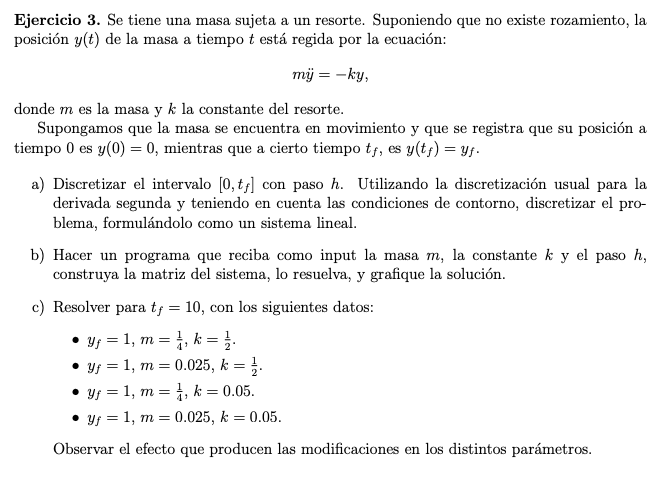

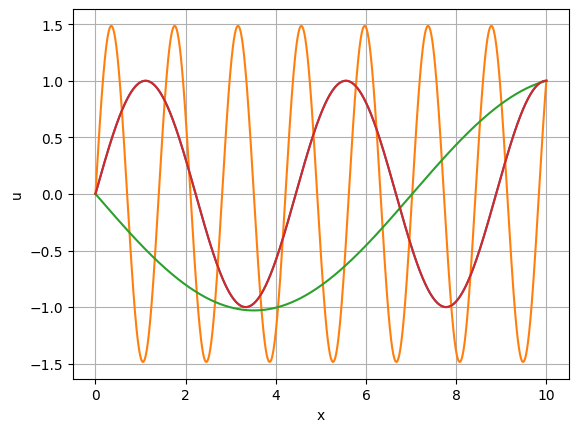

In [36]:
def DifFinitas_ej3(h,t0,tf,m,k):
    N = int((tf-t0)/h)
    t = np.linspace(t0,tf,N+1)
    u = np.zeros(N-1)
    b = np.zeros(N-1)

    Diag = np.ones(N-1)* ( -2/(h**2) + k/m )
    DiagArriba = np.ones(N-2)*(1/h**2)

    A = np.diag(Diag) + np.diag(DiagArriba,1) + np.diag(DiagArriba,-1)

    b[0] = -(1/h**2) * 0 #Problemon... para el algoritmo!
    b[-1] = -(1/h**2) * 1

    u = np.linalg.solve(A,b)
    return t,u

sets_data = [[1/4,1/2], [0.025,1/2], [1/4,0.05], [0.025,0.05]]
#sets_data = [[1/4,1/2]]


h = 0.001
tf = 10
t0 = 0
sols = []

for data in sets_data:
    m = data[0]
    k = data[1]
    t,u = DifFinitas_ej3(h,t0,tf,m,k)

    u = np.append(u,1)
    u = np.append(0,u)
    sols.append((t, u))

for t, u in sols:
    plt.plot(t,u)
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.show()

# Ej. 4

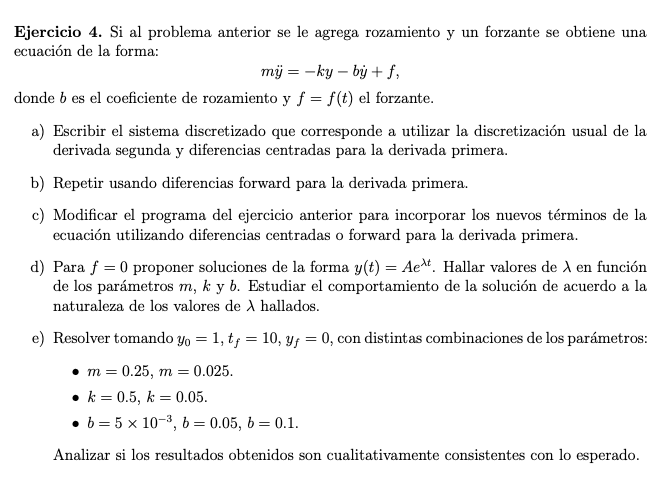

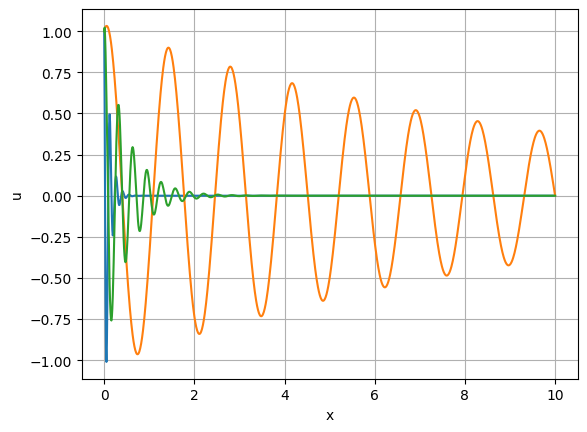

In [ ]:
def DifFinitas_ej4(h,t0,tf,m,k,B):
    N = int((tf-t0)/h)
    t = np.linspace(t0,tf,N+1)
    u = np.zeros(N-1)
    b = np.zeros(N-1)

    Bmoño = B/m
    kmoño = k/m


    Diag = np.ones(N-1)* ( -2/(h**2) + kmoño + Bmoño/h  )
    DiagArriba = np.ones(N-2)*(1/h**2 + Bmoño/(2*h))
    DiagAbajo = np.ones(N-2)*(1/h**2 - Bmoño/(2*h))

    A = np.diag(Diag) + np.diag(DiagArriba,1) + np.diag(DiagAbajo,-1)

    b[0] = -(1/h**2 + Bmoño/(2*h)) * 1  #Problemon... para el algoritmo!
    b[-1] = -(1/h**2 - Bmoño/(2*h)) * 0

    u = np.linalg.solve(A,b)
    return t,u

#sets_data = [[1/4,1/2], [0.025,1/2], [1/4,0.05], [0.025,0.05]]
sets_data = [[0.25,0.25,5],[0.25,0.25,0.05],[0.25,0.25,1]]


h = 0.01
tf = 10
t0 = 0
sols = []

for data in sets_data:
    m = data[0]
    k = data[1]
    B = data[2]
    t,u = DifFinitas_ej4(h,t0,tf,m,k,B)

    u = np.append(u,0)
    u = np.append(1,u)
    sols.append((t, u))

for t, u in sols:
    plt.plot(t,u)
plt.xlabel('x')
plt.ylabel('u')
plt.grid()
plt.show()

# Ej. 6

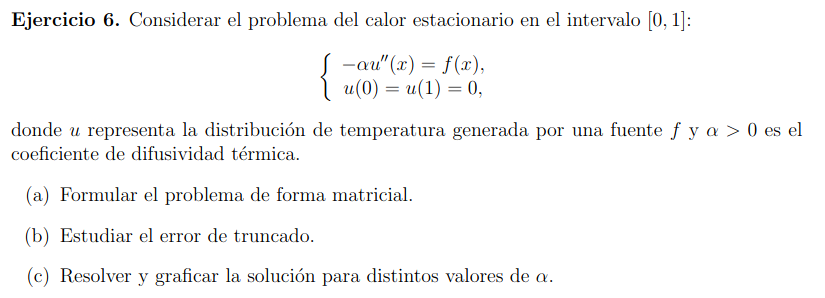

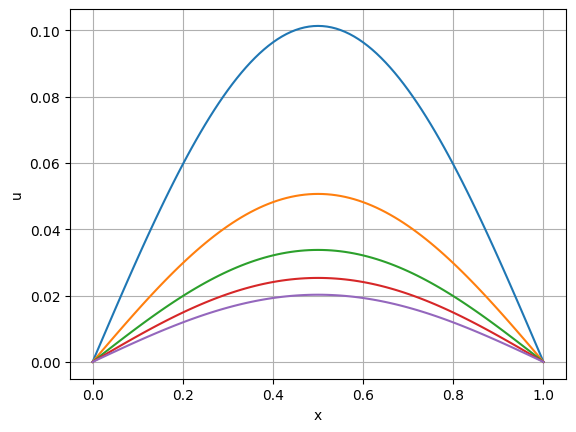

In [ ]:
def f(x):
    return np.sin(x * np.pi)

def DifFinitas(t0,tf,alpha,h,f):
    N = int((tf-t0)/h)
    t = np.linspace(t0, tf, N+1)
    u = np.zeros(N-1)
    b = np.zeros(N-1)

    for i in range(1,N):
        b[i-1] = f(t[i])

    Diag=np.ones(N-1)*(2*alpha/(h**2))
    DiagArriba=np.ones(N-2)*(-alpha/h**2)

    A=np.diag(Diag)+np.diag(DiagArriba,1)+np.diag(DiagArriba,-1)

    u=np.linalg.solve(A,b)

    return t,u

t0=0
tf=1
alpha=1
h=0.01


alpha_values = [1,2,3,4,5]

sols = []

for alpha in alpha_values:
    t, u = DifFinitas(t0, tf, alpha, h, f)
    u = np.append(u,0)
    u = np.append(0,u)
    sols.append((t, u))

for t, u in sols:
    plt.plot(t,u)
    plt.xlabel('x')
    plt.ylabel('u')
    plt.grid()
plt.show()

In [ ]:
# prompt: dame una matriz ejemplo y dame la primera fila y la primera columna usando []

import numpy as np

# Ejemplo de matriz
matriz = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Primera fila
primera_fila = matriz[0, :]  # o matriz[0]
print("Primera fila:", primera_fila)

# Primera columna
primera_columna = matriz[:, 0]
print("Primera columna:", primera_columna)


Primera fila: [1 2 3]
Primera columna: [1 4 7]


# Ej. 8

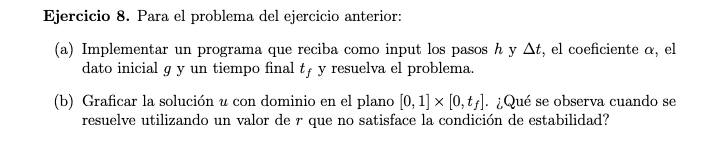

Text(0, 0.5, '$x$')

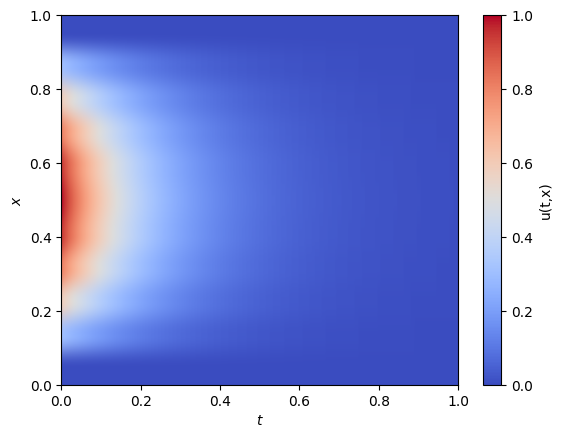

In [34]:
def DifFinitasCalor(x0,xf,t0,tf,alpha,DeltaX,DeltaT,g):
    N=int((xf-x0)/DeltaX)
    x=np.linspace(x0,xf,N+1)
    M=int((tf-t0)/DeltaT)
    t=np.linspace(t0,tf,M+1)

    u=np.zeros((M+1,N+1))

    u[0,:]=g(x)

    r=DeltaT/DeltaX**2

    Diag=np.ones(N-1)*(1-2*alpha*r)
    DiagArriba=np.ones(N-2)*(alpha*r)

    A=np.diag(Diag)+np.diag(DiagArriba,1)+np.diag(DiagArriba,-1)

    for i in range(1,M+1):
        u[i,1:N]=A @ u[i-1,1:N]

    return t,u

x0=0
xf=1
t0=0
tf=1
alpha=0.5
DeltaX=0.1
DeltaT=0.001
k = DeltaX
h = DeltaT
M=int((tf-t0)/DeltaT)
N=int((xf-x0)/DeltaX)

x=np.linspace(x0,xf,N+1)
g = lambda x: np.sin(np.pi * x)
t,u= DifFinitasCalor(x0,xf,t0,tf,alpha,DeltaX,DeltaT,g)

plt.imshow(u.T,aspect="auto",extent=[t[0],t[-1],x[0],x[-1]],origin="lower",cmap="coolwarm")
plt.colorbar(label="u(t,x)")
plt.xlabel("$t$")
plt.ylabel("$x$")

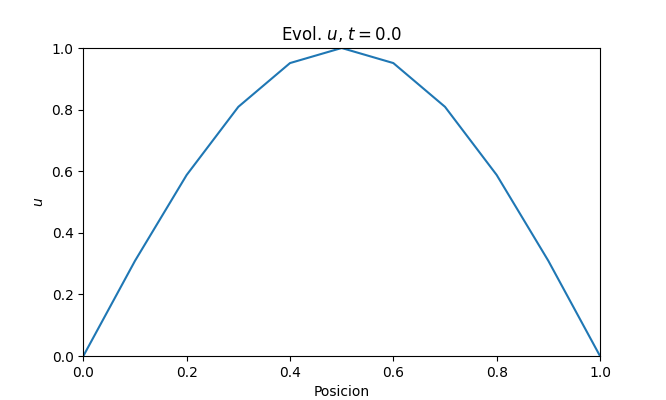

In [35]:
animacion((20/3,4), u, 'Evol. $u$','Posicion','$u$',x,h,tf,6)

# Problema de Osvaldo
Resolvemos la ec. del calor con dif. finitas y $n-1$ pod's utilizando solveivp

In [ ]:
def heat_equation(t0, tf, x0, xf, CCizq, CCder, alpha, h, k):
    M = int((tf - t0) / h)
    N = int((xf - x0) / k)

    x = np.linspace(x0, xf, N+1)
    t = np.linspace(t0, tf, M+1)

    #  A (N-1) x (N-1)
    Diag = np.ones(N-1) * (-2)
    DiagArriba = np.ones(N-2)
    A = (np.diag(Diag) + np.diag(DiagArriba, 1) + np.diag(DiagArriba, -1)) * (alpha / k**2)

    # ODE's
    def heat_ode(t, u):
        c = np.zeros(N-1)
        c[0] = (alpha / k**2) * CCizq
        c[-1] = (alpha / k**2) * CCder
        return A @ u + c  # du/dt = A * u + c

    x_centro = (x0 + xf) / 2
    sigma = (xf - x0) / 10
    u0 = np.exp(-((x[1:-1] - x_centro) ** 2) / (2 * sigma**2)) #C.I. Gaussiana
    u0 = np.sin(np.pi * x[1:-1]) #C.I. Seno

    sol = solve_ivp(heat_ode, [t0, tf], u0, t_eval=t, method='RK45') #solver

    u_full = np.zeros((N+1, M+1))
    u_full[1:-1, :] = sol.y
    u_full[0, :] = CCizq
    u_full[-1, :] = CCder

    return x, t, u_full

In [ ]:
t0 = 0
tf = 0.5
x0 = 0
xf = 1
CCizq = 0
CCder = 0
alpha = 1
h = 0.01
k = 0.01

x, t, u_full = heat_equation(t0, tf, x0, xf, CCizq, CCder, alpha, h, k)


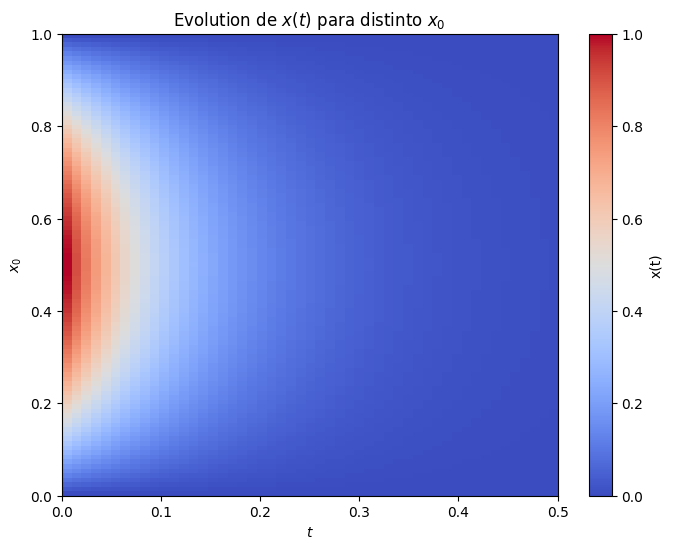

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(u_full, aspect="auto", extent=[t[0], t[-1], x[0], x[-1]], origin="lower", cmap="coolwarm")

plt.colorbar(label="x(t)")
plt.xlabel("$t$")
plt.ylabel("$x_0$")
plt.title("Evolution de $x(t)$ para distinto $x_0$")
plt.show()

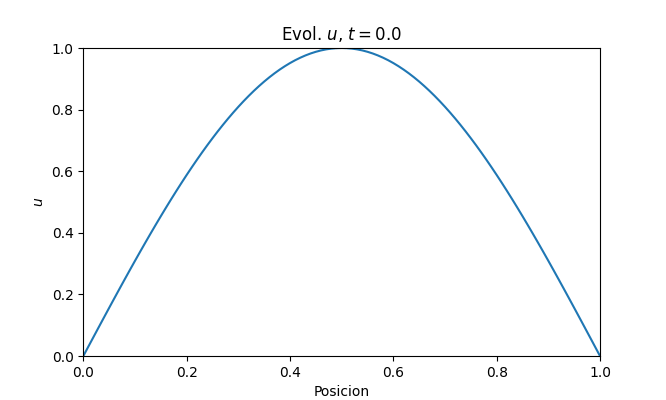

In [ ]:
animacion((20/3,4), u_full.T, 'Evol. $u$','Posicion','$u$',x,h,tf,6)